# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mlxtend.frequent_patterns import fpgrowth, association_rules
import networkx as nx
import textwrap

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


### **Data Preparation**

#### Load the preprocessed dataset

In [2]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Lower-middle income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Low income
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19424,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Lower-middle income
19425,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0

#### List down important columns for association

In [3]:
cols = [
    'TOTEX', 'NFOOD', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG',
    'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
    'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH',
    'TRANSPORT', 'COMMUNICATION', 'RECREATION',
    'EDUCATION', 'MISCELLANEOUS', 'DURABLE',
    'INSURANCE', 'OCCASION', 'OTHER_EXPENDITURE',
    'FOOD_ACCOM_SRVC', 'FOOD', 'FOOD_HOME', 'BREAD',
    'MEAT', 'FISH', 'MILK','OIL', 'FRUIT', 'VEG',
    'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE',
    'TEA', 'COCOA', 'SOFTDRINKS', 'WATER', 'OTHER_NON_ALCOHOL',
    'FOOD_OUTSIDE', 'SOCIAL_CLASS'
]

nfood_cols = [
    'NFOOD', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG',
    'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
    'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH',
    'TRANSPORT', 'COMMUNICATION', 'RECREATION',
    'EDUCATION', 'MISCELLANEOUS', 'DURABLE',
    'INSURANCE', 'OCCASION', 'OTHER_EXPENDITURE',
    'FOOD_ACCOM_SRVC','SOCIAL_CLASS', 'TOTEX'
]

food_cols = [
     'FOOD', 'FOOD_HOME', 'BREAD',
    'MEAT', 'FISH', 'MILK','OIL', 'FRUIT', 'VEG',
    'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE',
    'TEA', 'COCOA', 'SOFTDRINKS', 'WATER', 'OTHER_NON_ALCOHOL',
    'FOOD_OUTSIDE', 'SOCIAL_CLASS', 'TOTEX'
]

In [4]:
all_expenditures = final_fies[cols]
all_expenditures = all_expenditures.drop(
    columns=[col for col in all_expenditures.columns if (all_expenditures[col] == 0).sum() > 10000]
)

all_expenditures

,TOTEX,NFOOD,ALCOHOL,CLOTH,HOUSING_WATER,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,MISCELLANEOUS,INSURANCE,OCCASION,OTHER_EXPENDITURE,FOOD,FOOD_HOME,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,SOFTDRINKS,WATER,FOOD_OUTSIDE,SOCIAL_CLASS
0,260720.0,73396.0,0.0,2370,36660,2674,1860,6344,8200,0,7122,8166,0,0,187324.0,105759.0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,2470.0,81565.0,Lower-middle income
1,376312.0,147351.0,0.0,2650,70440,5510,21595,3720,13660,5080,14996,0,500,0,228961.0,114961.0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,1690.0,114000.0,Lower-middle income
2,162675.0,66646.0,0.0,2730,37380,4742,1690,6500,5200,100,6654,0,1500,0,96029.0,85629.0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,2470.0,10400.0,Low income
3,409740.0,107504.0,0.0,960,69760,3300,300,5668,7800,1820,14956,0,1100,0,302236.0,140636.0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,455.0,1560.0,161600.0,Lower-middle income
4,602396.0,169744.0,9360.0,2200,61940,6118,1800,39000,15600,0,17400,5826,6000,4500,432652.0,194572.0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,3380.0,238080.0,Middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19424,317006.0,187178.0,5100.0,2410,105940,10174,5250,14300,12374,75,16155,10800,0,2000,129828.0,99128.0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,870.0,2600.0,30700.0,Lower-middle income
19425,190949.0,114860.0,5460.0,2800,61950,3149,1260,20228,2574,0,3691,10800,0,200,76089.0,32539.0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0,790.0,0.0,3075.0,1560.0,1300.0,43550.0,Low income
19426,463158.0,306489.0,0.0,14449,148800,4742,8776,39000,16800,120,10562,17700,0,45540,156669.0,137089.0,27195.0,32097.0,22240.0,9821.0,1606.0,17137.0,15163.0,2305.0,2940.0,1318.0,1198.0,689.0,3380.0,19580.0,Lower-middle income
19427,246504.0,140345.0,600.0,1050,75040,3471,1042,25510,6000,0,10382,7890,0,0,106159.0,102459.0,28417.0,19236.0,15070.0,7199.0,2444.0,8813.0,7849.0,676.0,1886.0,1078.0,6677.0,514.0,2600.0,3700.0,Low income


#### Categorize Expenditures

This step is important so we can anlyze the probability of relationships between items. Since every column (except `SOCIAL_CLASS`) have numerical values, we will normalize them. 

The goal is to understand spending behavior relative to a person's total budget allocation. Dividing expenditure cost by the the total expenditure cost will answer the question "How much of their budget do they allocate to each category?"

In [5]:
# Copy of the TOTEX column since we will also categorize the TOTEX
totex_copy = final_fies['TOTEX']

In [6]:
def categorize_expenditure(df, column):
    if (df[column] < 0).any():
        raise ValueError(
            f"Error: Column '{column}' contains negative values."
        )

    denom = 1 if column == 'TOTEX' else totex_copy
    normalized = df[column] / denom

    q1 = normalized.quantile(0.25)
    q3 = normalized.quantile(0.75)

    return normalized.apply(lambda x: (
        "none" if x == 0 else
        "low" if x <= q1 else
        "high" if x >= q3 else
        "medium"
    ))

In [8]:
expenditure_all_cols = [col for col in all_expenditures.columns if col not in ["SOCIAL_CLASS"]]

In [9]:
all_expenditures = all_expenditures.copy()

for col in expenditure_all_cols:
    all_expenditures[col] = categorize_expenditure(all_expenditures, col)

In [11]:
def filter_by_social_class(df, social_class):
    df = df[df['SOCIAL_CLASS'] == social_class]
    df = df.drop(columns=['SOCIAL_CLASS'])
    return df

In [12]:
df_poor = filter_by_social_class(all_expenditures, 'Poor')
df_poor

,TOTEX,NFOOD,ALCOHOL,CLOTH,HOUSING_WATER,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,MISCELLANEOUS,INSURANCE,OCCASION,OTHER_EXPENDITURE,FOOD,FOOD_HOME,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,SOFTDRINKS,WATER,FOOD_OUTSIDE
13,low,medium,none,low,medium,medium,medium,low,low,none,medium,none,high,none,medium,high,high,low,medium,medium,high,high,high,high,medium,medium,high,medium,medium,low
21,low,low,medium,low,medium,medium,low,low,medium,none,low,none,none,none,high,medium,high,low,medium,low,low,low,low,low,high,none,low,none,medium,high
51,low,low,none,low,medium,medium,none,medium,medium,none,high,none,medium,none,high,medium,high,medium,low,medium,medium,high,low,low,medium,medium,high,high,medium,high
53,low,low,none,medium,low,high,high,low,low,none,high,none,medium,medium,high,medium,low,low,low,high,low,high,medium,low,high,high,high,medium,high,high
55,low,low,none,none,medium,medium,low,low,low,none,medium,none,medium,medium,high,low,low,none,none,low,none,medium,none,none,low,none,high,high,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19276,low,low,none,medium,high,medium,medium,medium,low,none,medium,none,none,none,high,medium,medium,medium,medium,medium,high,high,high,medium,medium,medium,low,medium,high,high
19369,low,medium,medium,none,high,medium,none,medium,low,none,low,none,none,none,medium,medium,medium,low,high,low,high,low,high,medium,low,none,medium,none,high,medium
19382,low,low,none,low,medium,medium,high,none,none,none,low,none,none,none,high,low,low,none,none,high,none,low,none,low,low,none,low,none,low,high
19390,low,low,none,medium,medium,medium,none,medium,low,none,medium,none,none,none,high,high,high,high,high,high,medium,medium,high,high,medium,medium,high,none,high,medium


In [13]:
df_low = filter_by_social_class(all_expenditures, 'Low income')
df_low

,TOTEX,NFOOD,ALCOHOL,CLOTH,HOUSING_WATER,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,MISCELLANEOUS,INSURANCE,OCCASION,OTHER_EXPENDITURE,FOOD,FOOD_HOME,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,SOFTDRINKS,WATER,FOOD_OUTSIDE
2,low,low,none,medium,medium,high,medium,medium,medium,medium,medium,none,medium,none,high,high,high,high,medium,low,high,low,high,high,medium,none,high,none,high,medium
5,low,low,none,medium,medium,medium,low,medium,medium,none,medium,none,medium,none,high,high,high,medium,medium,medium,high,low,medium,medium,medium,medium,high,none,high,high
8,medium,low,none,medium,low,low,medium,medium,high,medium,low,none,medium,none,high,medium,high,medium,high,low,low,medium,high,medium,medium,medium,high,none,medium,high
10,medium,low,none,medium,low,medium,medium,low,medium,none,high,none,medium,none,high,high,high,low,low,high,low,low,low,high,high,medium,medium,none,high,high
11,medium,low,medium,medium,medium,medium,medium,high,low,medium,medium,medium,medium,none,high,medium,medium,medium,low,high,low,low,low,medium,high,none,medium,none,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19419,medium,medium,medium,medium,high,high,high,low,medium,high,high,medium,none,medium,medium,medium,high,medium,medium,medium,medium,low,medium,medium,high,low,high,medium,high,medium
19420,medium,medium,none,high,high,high,medium,low,high,high,high,medium,none,medium,medium,medium,medium,medium,medium,medium,medium,low,low,low,medium,medium,high,high,medium,medium
19422,low,high,none,medium,high,high,high,medium,high,high,medium,none,none,none,low,medium,medium,low,high,low,medium,low,medium,low,medium,none,high,low,high,low
19425,low,medium,high,medium,medium,medium,medium,high,low,none,low,high,none,medium,medium,low,medium,low,low,low,low,low,low,low,low,none,high,high,medium,high


In [14]:
df_lower_middle = filter_by_social_class(all_expenditures, 'Lower-middle income')
df_lower_middle

,TOTEX,NFOOD,ALCOHOL,CLOTH,HOUSING_WATER,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,MISCELLANEOUS,INSURANCE,OCCASION,OTHER_EXPENDITURE,FOOD,FOOD_HOME,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,SOFTDRINKS,WATER,FOOD_OUTSIDE
0,medium,low,none,medium,low,low,medium,low,medium,none,medium,medium,none,none,high,high,high,high,medium,low,high,medium,high,medium,medium,none,high,none,medium,high
1,medium,low,none,medium,low,medium,high,low,medium,high,medium,none,medium,none,high,medium,medium,medium,medium,medium,medium,medium,medium,low,low,none,medium,none,low,high
3,high,low,none,low,low,low,low,low,low,medium,medium,none,medium,none,high,medium,medium,medium,high,medium,low,medium,low,low,medium,none,high,low,low,high
6,medium,low,high,medium,medium,medium,medium,medium,medium,none,high,medium,medium,none,high,medium,medium,high,medium,high,low,medium,medium,low,low,high,high,none,medium,high
7,medium,low,high,low,low,high,low,low,medium,medium,medium,none,medium,none,high,high,high,high,medium,low,high,medium,high,medium,medium,none,high,none,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,medium,high,medium,high,medium,high,medium,high,high,high,high,high,none,medium,low,low,medium,medium,low,low,high,low,low,low,medium,medium,high,low,medium,medium
19423,medium,medium,high,high,low,high,medium,high,medium,high,high,high,none,medium,medium,medium,medium,medium,low,low,high,low,medium,low,medium,none,medium,high,high,high
19424,medium,medium,high,medium,medium,high,medium,medium,medium,medium,high,medium,none,medium,medium,medium,medium,medium,medium,high,high,low,low,medium,medium,none,medium,medium,medium,medium
19426,high,high,none,high,medium,low,medium,high,medium,medium,low,medium,none,high,low,medium,medium,medium,medium,medium,low,high,high,medium,low,medium,low,medium,medium,medium


In [15]:
df_middle = filter_by_social_class(all_expenditures, 'Middle income')
df_middle

,TOTEX,NFOOD,ALCOHOL,CLOTH,HOUSING_WATER,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,MISCELLANEOUS,INSURANCE,OCCASION,OTHER_EXPENDITURE,FOOD,FOOD_HOME,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,SOFTDRINKS,WATER,FOOD_OUTSIDE
4,high,low,high,low,low,low,low,medium,medium,none,medium,medium,medium,medium,high,medium,medium,medium,high,medium,low,low,medium,medium,low,none,high,none,medium,high
24,high,low,medium,low,medium,low,high,medium,medium,none,medium,none,medium,none,high,medium,low,medium,medium,low,low,low,high,low,medium,high,medium,medium,medium,high
30,high,low,medium,low,medium,medium,medium,low,medium,none,low,high,medium,medium,high,medium,medium,high,medium,low,low,medium,low,low,medium,medium,medium,medium,medium,high
36,high,low,medium,low,medium,medium,none,low,medium,medium,low,medium,high,high,high,medium,medium,medium,medium,low,low,low,low,low,low,none,high,low,medium,high
62,high,low,medium,medium,low,low,high,medium,medium,none,low,high,medium,high,high,medium,medium,high,high,low,low,medium,medium,low,medium,medium,high,high,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19400,high,high,medium,low,high,medium,medium,high,low,high,low,medium,high,medium,low,low,medium,medium,low,medium,low,medium,low,medium,medium,medium,low,medium,medium,medium
19402,medium,high,high,medium,low,high,high,medium,high,high,medium,medium,medium,medium,low,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,none,low,high,high,none
19410,high,low,none,high,low,high,medium,low,medium,none,high,high,medium,medium,high,high,medium,high,high,medium,high,high,high,high,high,high,medium,low,low,medium
19415,high,high,high,medium,high,medium,medium,medium,high,medium,high,high,none,medium,low,low,low,medium,medium,low,medium,low,low,medium,low,none,medium,high,low,medium


#### One-Hot Encoding

In [16]:
poor_encoded = pd.get_dummies(df_poor)
low_encoded = pd.get_dummies(df_low)
lower_middle_encoded = pd.get_dummies(df_lower_middle)
middle_encoded = pd.get_dummies(df_middle)

### **Association Rule Mining using FP-growth**

In [17]:
MIN_SUPPORT = 0.3
MIN_THRESHOLD = 0.7

**filter_social_class**

> This function filters out rows where `SOCIAL_CLASS` appears in either antecedents or consequents. This can help us analyze how income groups influence spending behavior

In [18]:
def filter_social_class(rules):
    return rules[
        rules['antecedents'].apply(
            lambda x: any('SOCIAL_CLASS' in str(item) for item in x)
        ) |
        rules['consequents'].apply(
            lambda x: any('SOCIAL_CLASS' in str(item) for item in x)
        )
    ]

**top_n_rules**

> This function extracts the top N association rules based on a given metric. Usually, we use lift to identify the strongest relationships among the itemsets

In [19]:
def top_n_rules(rules, n, condition='lift'):
    top_rules = rules.nlargest(n, condition)
    antecedents = top_rules["antecedents"]
    consequents = top_rules["consequents"]

    return [
        f'{list(a)} → {list(c)}' for a, c in zip(antecedents, consequents)
    ]

**rule_drop_duplicates**

> This function removes duplicate rules where antecedents and consequents appear in just different orders. 

> An example of this is {TEA_none -> COCOA_none} and {COCOA_none -> TEA_none}. In order for us to find more patterns, we can remove the duplicated ones so we will not be confused.

In [20]:
def rule_drop_duplicates(rules):
    rules['sorted'] = rules.apply(
        lambda row: frozenset(row["antecedents"]) | frozenset(row["consequents"]),
        axis=1
    )

    rules = rules.drop_duplicates(subset=['sorted']).drop(columns=['sorted'])

    return rules

**filter_by_value_presence**

> This function filters out rules that do not contain expenditure categories labeled as low, medium, high. The reason why we also want to look at this is to find patterns aside from categories with no spending (none). 

In [21]:
def filter_by_value_presence(rules):
    keywords = ["_low", "_medium", "_high"]
    return rules[
        rules["antecedents"].astype(str).apply(lambda x: any(keyword in x for keyword in keywords)) |
        rules["consequents"].astype(str).apply(lambda x: any(keyword in x for keyword in keywords))
    ]

**plot_dag**

> This plots association rules as a Directed Acyclic Graph (DAG). We also provided the value of lift to indicate the relationship value of the antecedents and consequents.

In [22]:
def plot_dag(rules, title=None):
    G = nx.DiGraph()

    for _, row in rules.iterrows():
        G.add_edge(row["antecedents"], row["consequents"], weight=row["confidence"], lift=row["lift"])

    pos = nx.spring_layout(G, seed=42, k=3.0)  

    plt.figure(figsize=(14, 8))

    edges, colors = [], []
    for u, v, d in G.edges(data=True):
        edges.append((u, v))
        lift = d["lift"]

        if lift > 1:
            colors.append("green")  
        elif lift == 1:
            colors.append("gray") 
        else:
            colors.append("red")  

    nx.draw_networkx_nodes(
        G, pos, node_color="lightblue", node_size=5000, edgecolors="black"
    )

    nx.draw_networkx_edges(
        G, pos, edgelist=edges, edge_color=colors, width=2,
        arrows=True, arrowsize=50, connectionstyle="arc3,rad=0.2",
        min_target_margin=40
    )

    edge_labels = {(u, v): f"Lift: {d['lift']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, font_size=10, font_color="black", label_pos=0.4
    )

    labels = {node: str(node).replace(", ", "\n") for node in G.nodes()}
    nx.draw_networkx_labels(
        G, pos, labels, font_size=12, font_weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3")
    )

    plt.title(f"{title} Decision Flow: Antecedent → Consequent", fontsize=14, fontweight="bold")

    plt.margins(0.2)
    plt.show()

#### Poor Class

In [23]:
freq_itemsets_poor = fpgrowth(
    poor_encoded, min_support=MIN_SUPPORT, use_colnames=True
)

rules_poor = association_rules(
    freq_itemsets_poor, metric="confidence", min_threshold=MIN_THRESHOLD
)

rules_poor

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(TOTEX_low),(INSURANCE_none),0.995320,0.890796,0.887676,0.891850,1.001183,1.0,0.001049,1.009745,0.252490,0.889063,0.009651,0.944173
1,(INSURANCE_none),(TOTEX_low),0.890796,0.995320,0.887676,0.996497,1.001183,1.0,0.001049,1.336193,0.010821,0.889063,0.251605,0.944173
2,(TOTEX_low),(OTHER_EXPENDITURE_none),0.995320,0.751950,0.747270,0.750784,0.998449,1.0,-0.001161,0.995320,-0.249216,0.747270,-0.004702,0.872280
3,(OTHER_EXPENDITURE_none),(TOTEX_low),0.751950,0.995320,0.747270,0.993776,0.998449,1.0,-0.001161,0.751950,-0.006224,0.747270,-0.329876,0.872280
4,(INSURANCE_none),(OTHER_EXPENDITURE_none),0.890796,0.751950,0.683307,0.767075,1.020115,1.0,0.013473,1.064936,0.180561,0.712195,0.060977,0.837894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,(BREAD_medium),(TOTEX_low),0.360374,0.995320,0.357254,0.991342,0.996003,1.0,-0.001434,0.540562,-0.006234,0.357812,-0.849928,0.675138
916,(BREAD_medium),(INSURANCE_none),0.360374,0.890796,0.315133,0.874459,0.981660,1.0,-0.005887,0.869869,-0.028379,0.336667,-0.149598,0.614112
917,"(TOTEX_low, BREAD_medium)",(INSURANCE_none),0.357254,0.890796,0.313573,0.877729,0.985332,1.0,-0.004668,0.893136,-0.022637,0.335559,-0.119651,0.614872
918,"(INSURANCE_none, BREAD_medium)",(TOTEX_low),0.315133,0.995320,0.313573,0.995050,0.999728,1.0,-0.000085,0.945398,-0.000396,0.314554,-0.057756,0.655048


In [24]:
no_dups_poor = rule_drop_duplicates(rules_poor)
no_dups_poor

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(TOTEX_low),(INSURANCE_none),0.995320,0.890796,0.887676,0.891850,1.001183,1.0,0.001049,1.009745,0.252490,0.889063,0.009651,0.944173
2,(TOTEX_low),(OTHER_EXPENDITURE_none),0.995320,0.751950,0.747270,0.750784,0.998449,1.0,-0.001161,0.995320,-0.249216,0.747270,-0.004702,0.872280
4,(INSURANCE_none),(OTHER_EXPENDITURE_none),0.890796,0.751950,0.683307,0.767075,1.020115,1.0,0.013473,1.064936,0.180561,0.712195,0.060977,0.837894
6,"(TOTEX_low, INSURANCE_none)",(OTHER_EXPENDITURE_none),0.887676,0.751950,0.680187,0.766257,1.019026,1.0,0.012700,1.061206,0.166221,0.708943,0.057676,0.835410
11,(TOTEX_low),(ALCOHOL_none),0.995320,0.711388,0.708268,0.711599,1.000296,1.0,0.000209,1.000729,0.063142,0.709375,0.000729,0.853606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,(COFFEE_medium),(INSURANCE_none),0.382215,0.890796,0.338534,0.885714,0.994296,1.0,-0.001942,0.955538,-0.009201,0.362270,-0.046531,0.632875
912,"(TOTEX_low, COFFEE_medium)",(INSURANCE_none),0.379095,0.890796,0.335413,0.884774,0.993240,1.0,-0.002283,0.947738,-0.010843,0.358932,-0.055144,0.630653
915,(BREAD_medium),(TOTEX_low),0.360374,0.995320,0.357254,0.991342,0.996003,1.0,-0.001434,0.540562,-0.006234,0.357812,-0.849928,0.675138
916,(BREAD_medium),(INSURANCE_none),0.360374,0.890796,0.315133,0.874459,0.981660,1.0,-0.005887,0.869869,-0.028379,0.336667,-0.149598,0.614112


In [25]:
top10_poor = top_n_rules(no_dups_poor, 10)
top10_poor

["['FOOD_high'] → ['NFOOD_low']",
 "['TOTEX_low', 'FOOD_high'] → ['NFOOD_low']",
 "['INSURANCE_none', 'FOOD_high'] → ['NFOOD_low']",
 "['TOTEX_low', 'INSURANCE_none', 'FOOD_high'] → ['NFOOD_low']",
 "['FOOD_high', 'OTHER_EXPENDITURE_none'] → ['NFOOD_low']",
 "['TOTEX_low', 'FOOD_high', 'OTHER_EXPENDITURE_none'] → ['NFOOD_low']",
 "['INSURANCE_none', 'FOOD_high', 'OTHER_EXPENDITURE_none'] → ['NFOOD_low']",
 "['NFOOD_medium'] → ['FOOD_medium']",
 "['TOTEX_low', 'NFOOD_medium'] → ['FOOD_medium']",
 "['INSURANCE_none', 'NFOOD_medium'] → ['FOOD_medium']"]

##### Poor DAG

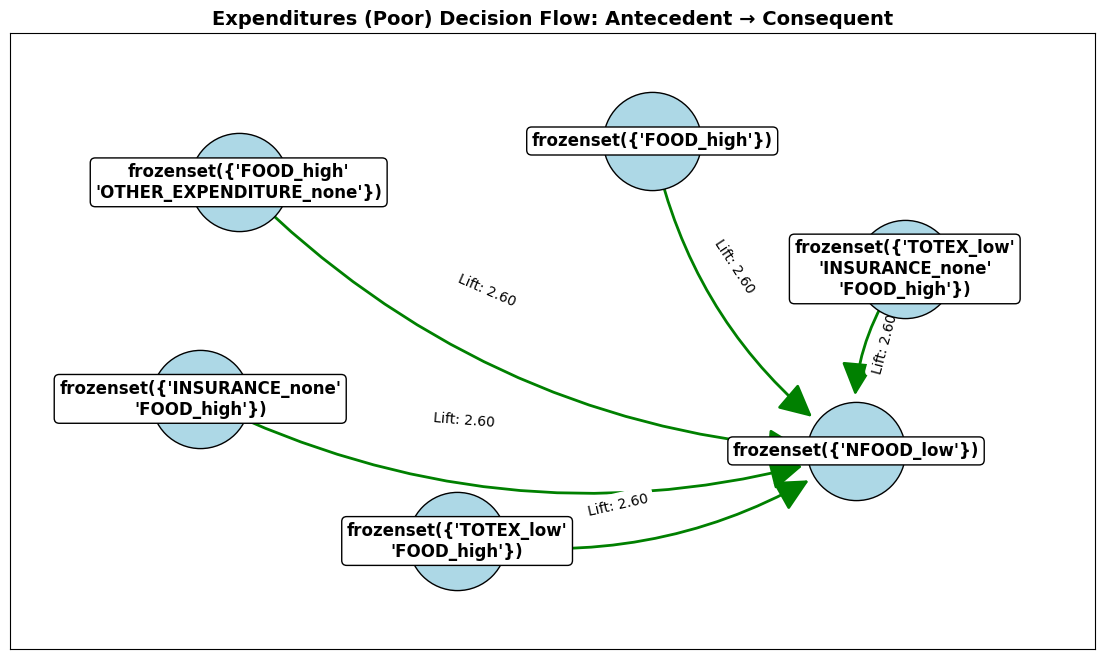

In [34]:
plot_dag(no_dups_poor.nlargest(5, 'lift'), 'Expenditures (Poor)')

**Insights**

- Households that spend highly on foods, often do not allocate spending to other discretionary expenditures like insurance or additional expenditures. This indicates that the food remains the highest priority for poor households, potentially limiting spending on other essentials.

- Households with low total expenditure tend to still prioritize food. However, this often at the cost of other necessities, leaving little room for other essential expenses (non-food).

- Since poor-income households do not spend on insurance or other miscellaneous expenditures, their long-term financial security are deprioritized due to immediate survival needs

**Recommendations**

- There should be food security programs for poor households in NCR, so the do not have to compromise essential non-food expenses.

#### Low Income Class

In [28]:
freq_itemsets_low = fpgrowth(
    low_encoded, min_support=MIN_SUPPORT, use_colnames=True
)

rules_low = association_rules(
    freq_itemsets_low, metric="confidence", min_threshold=MIN_THRESHOLD
)

rules_low

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(FOOD_high),(NFOOD_low),0.335097,0.335097,0.335097,1.000000,2.984208,1.0,0.222807,inf,1.000000,1.000000,1.000000,1.000000
1,(NFOOD_low),(FOOD_high),0.335097,0.335097,0.335097,1.000000,2.984208,1.0,0.222807,inf,1.000000,1.000000,1.000000,1.000000
2,"(NFOOD_medium, MEAT_medium)",(FOOD_medium),0.301058,0.520309,0.301058,1.000000,1.921935,1.0,0.144415,inf,0.686311,0.578615,1.000000,0.789307
3,"(FOOD_medium, MEAT_medium)",(NFOOD_medium),0.301058,0.520309,0.301058,1.000000,1.921935,1.0,0.144415,inf,0.686311,0.578615,1.000000,0.789307
4,(FOOD_HOME_medium),(FOOD_medium),0.483696,0.520309,0.344394,0.712005,1.368427,1.0,0.092722,1.665621,0.521464,0.522116,0.399623,0.686953
5,(FOOD_HOME_medium),(NFOOD_medium),0.483696,0.520309,0.344394,0.712005,1.368427,1.0,0.092722,1.665621,0.521464,0.522116,0.399623,0.686953
6,"(FOOD_HOME_medium, NFOOD_medium)",(FOOD_medium),0.344394,0.520309,0.344394,1.000000,1.921935,1.0,0.165203,inf,0.731675,0.661902,1.000000,0.830951
7,"(FOOD_HOME_medium, FOOD_medium)",(NFOOD_medium),0.344394,0.520309,0.344394,1.000000,1.921935,1.0,0.165203,inf,0.731675,0.661902,1.000000,0.830951
8,(FOOD_HOME_medium),"(NFOOD_medium, FOOD_medium)",0.483696,0.520309,0.344394,0.712005,1.368427,1.0,0.092722,1.665621,0.521464,0.522116,0.399623,0.686953
9,(NFOOD_medium),(FOOD_medium),0.520309,0.520309,0.520309,1.000000,1.921935,1.0,0.249588,inf,1.000000,1.000000,1.000000,1.000000


In [29]:
no_dups_low = rule_drop_duplicates(rules_low)
no_dups_low

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(FOOD_high),(NFOOD_low),0.335097,0.335097,0.335097,1.000000,2.984208,1.0,0.222807,inf,1.000000,1.000000,1.000000,1.000000
2,"(NFOOD_medium, MEAT_medium)",(FOOD_medium),0.301058,0.520309,0.301058,1.000000,1.921935,1.0,0.144415,inf,0.686311,0.578615,1.000000,0.789307
4,(FOOD_HOME_medium),(FOOD_medium),0.483696,0.520309,0.344394,0.712005,1.368427,1.0,0.092722,1.665621,0.521464,0.522116,0.399623,0.686953
5,(FOOD_HOME_medium),(NFOOD_medium),0.483696,0.520309,0.344394,0.712005,1.368427,1.0,0.092722,1.665621,0.521464,0.522116,0.399623,0.686953
6,"(FOOD_HOME_medium, NFOOD_medium)",(FOOD_medium),0.344394,0.520309,0.344394,1.000000,1.921935,1.0,0.165203,inf,0.731675,0.661902,1.000000,0.830951
9,(NFOOD_medium),(FOOD_medium),0.520309,0.520309,0.520309,1.000000,1.921935,1.0,0.249588,inf,1.000000,1.000000,1.000000,1.000000


In [30]:
top10_low = top_n_rules(no_dups_low, 10)
top10_low

["['FOOD_high'] → ['NFOOD_low']",
 "['NFOOD_medium', 'MEAT_medium'] → ['FOOD_medium']",
 "['NFOOD_medium'] → ['FOOD_medium']",
 "['FOOD_HOME_medium', 'NFOOD_medium'] → ['FOOD_medium']",
 "['FOOD_HOME_medium'] → ['NFOOD_medium']",
 "['FOOD_HOME_medium'] → ['FOOD_medium']"]

##### Low income DAG

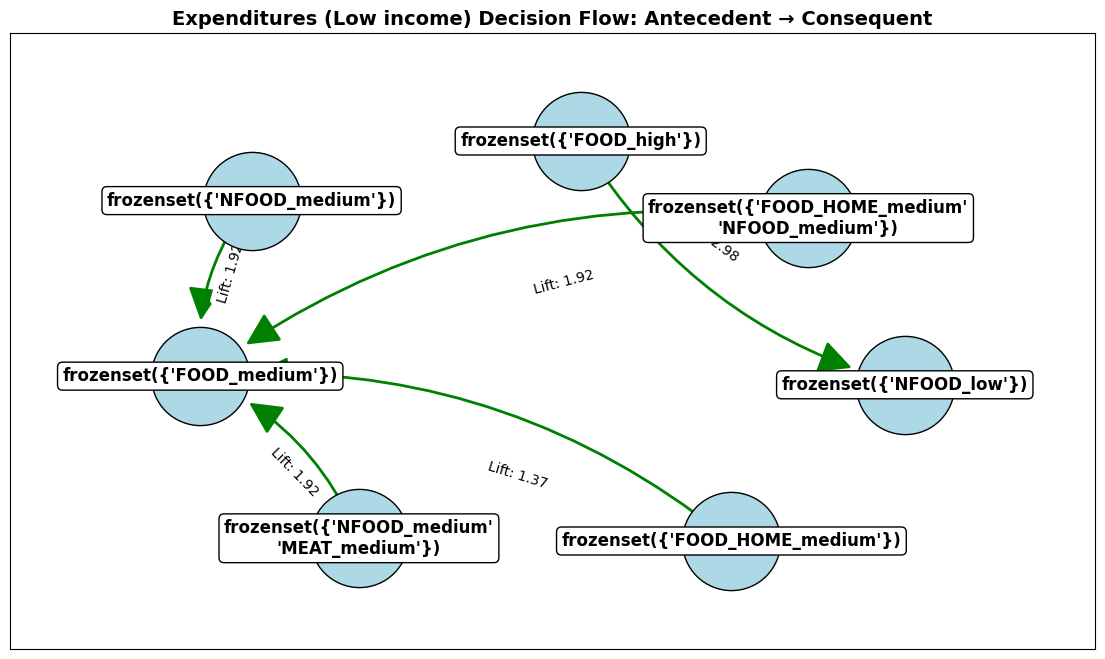

In [35]:
plot_dag(no_dups_low.nlargest(5, 'lift'), 'Expenditures (Low income)')

**Insights**

- Low-income households tend to have moderate spending on food. This differs from poor-income households, which allocated high percentage of their budget in food expenditures.

- Households that spend moderately on meat are often associated with moderate overall food spending. This suggest that protein sources remain a key part of household food spending even among lower-incom groups.

- Unlike poor households, low-income households exhibit a mix of both food and non-food expenditures. This suggests that low-income households may have slightly more flexibility in their spending but still prioritize food.

- Households that spend high on food often decrease their non-food expenditures. They are similar with those that spend moderately on food at home, who spend low on non-food expenditures. That is wh when needed, non-food spending is the first to be reduced in their budget.

#### Lower-middle Income Class

In [36]:
freq_itemsets_lower_middle = fpgrowth(
    lower_middle_encoded, min_support=MIN_SUPPORT, use_colnames=True
)

rules_lower_middle = association_rules(
    freq_itemsets_lower_middle, metric="confidence", min_threshold=MIN_THRESHOLD
)

rules_lower_middle

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(WATER_medium),(TOTEX_medium),0.528641,0.692553,0.370346,0.700563,1.011565,1.0,0.004234,1.026747,0.024254,0.435267,0.026051,0.617658
1,(FISH_medium),(TOTEX_medium),0.520930,0.692553,0.365169,0.700994,1.012187,1.0,0.004397,1.028228,0.025133,0.430464,0.027453,0.614136
2,(FISH_medium),(FOOD_HOME_medium),0.520930,0.545164,0.365719,0.702051,1.287779,1.0,0.081727,1.526557,0.466465,0.522177,0.344931,0.686447
3,(FOOD_NEC_medium),(TOTEX_medium),0.509363,0.692553,0.363406,0.713452,1.030175,1.0,0.010645,1.072931,0.059701,0.433395,0.067973,0.619093
4,(HEALTH_medium),(TOTEX_medium),0.504627,0.692553,0.353933,0.701375,1.012738,1.0,0.004452,1.029541,0.025391,0.419726,0.028694,0.606215
5,(OTHER_EXPENDITURE_none),(TOTEX_medium),0.428508,0.692553,0.316369,0.738303,1.066060,1.0,0.019604,1.174820,0.108429,0.393155,0.148806,0.597559
6,(BREAD_medium),(TOTEX_medium),0.550892,0.692553,0.395241,0.717457,1.035958,1.0,0.013719,1.088139,0.077287,0.465974,0.081000,0.644079
7,(FOOD_HOME_medium),(TOTEX_medium),0.545164,0.692553,0.394250,0.723176,1.044217,1.0,0.016695,1.110623,0.093100,0.467415,0.099604,0.646223
8,(OIL_medium),(TOTEX_medium),0.526327,0.692553,0.381362,0.724571,1.046231,1.0,0.016852,1.116246,0.093289,0.455347,0.104140,0.637616
9,(MEAT_medium),(FOOD_HOME_medium),0.526107,0.545164,0.375413,0.713568,1.308905,1.0,0.088598,1.587936,0.498008,0.539497,0.370252,0.701096


In [37]:
no_dups_lower_middle = rule_drop_duplicates(rules_lower_middle)
no_dups_lower_middle

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(WATER_medium),(TOTEX_medium),0.528641,0.692553,0.370346,0.700563,1.011565,1.0,0.004234,1.026747,0.024254,0.435267,0.026051,0.617658
1,(FISH_medium),(TOTEX_medium),0.520930,0.692553,0.365169,0.700994,1.012187,1.0,0.004397,1.028228,0.025133,0.430464,0.027453,0.614136
2,(FISH_medium),(FOOD_HOME_medium),0.520930,0.545164,0.365719,0.702051,1.287779,1.0,0.081727,1.526557,0.466465,0.522177,0.344931,0.686447
3,(FOOD_NEC_medium),(TOTEX_medium),0.509363,0.692553,0.363406,0.713452,1.030175,1.0,0.010645,1.072931,0.059701,0.433395,0.067973,0.619093
4,(HEALTH_medium),(TOTEX_medium),0.504627,0.692553,0.353933,0.701375,1.012738,1.0,0.004452,1.029541,0.025391,0.419726,0.028694,0.606215
5,(OTHER_EXPENDITURE_none),(TOTEX_medium),0.428508,0.692553,0.316369,0.738303,1.066060,1.0,0.019604,1.174820,0.108429,0.393155,0.148806,0.597559
6,(BREAD_medium),(TOTEX_medium),0.550892,0.692553,0.395241,0.717457,1.035958,1.0,0.013719,1.088139,0.077287,0.465974,0.081000,0.644079
7,(FOOD_HOME_medium),(TOTEX_medium),0.545164,0.692553,0.394250,0.723176,1.044217,1.0,0.016695,1.110623,0.093100,0.467415,0.099604,0.646223
8,(OIL_medium),(TOTEX_medium),0.526327,0.692553,0.381362,0.724571,1.046231,1.0,0.016852,1.116246,0.093289,0.455347,0.104140,0.637616
9,(MEAT_medium),(FOOD_HOME_medium),0.526107,0.545164,0.375413,0.713568,1.308905,1.0,0.088598,1.587936,0.498008,0.539497,0.370252,0.701096


In [38]:
top10_lower_middle = top_n_rules(no_dups_lower_middle, 10)
top10_lower_middle

["['NFOOD_medium'] → ['FOOD_medium']",
 "['FOOD_HOME_medium', 'NFOOD_medium'] → ['FOOD_medium']",
 "['BREAD_medium', 'FOOD_medium'] → ['NFOOD_medium']",
 "['FISH_medium', 'NFOOD_medium'] → ['FOOD_medium']",
 "['NFOOD_medium', 'MEAT_medium'] → ['FOOD_medium']",
 "['FOOD_medium'] → ['FOOD_HOME_medium']",
 "['NFOOD_medium'] → ['FOOD_HOME_medium']",
 "['MEAT_medium'] → ['FOOD_HOME_medium']",
 "['FISH_medium'] → ['FOOD_HOME_medium']",
 "['OTHER_EXPENDITURE_none'] → ['TOTEX_medium']"]

##### Lower-middle income DAG

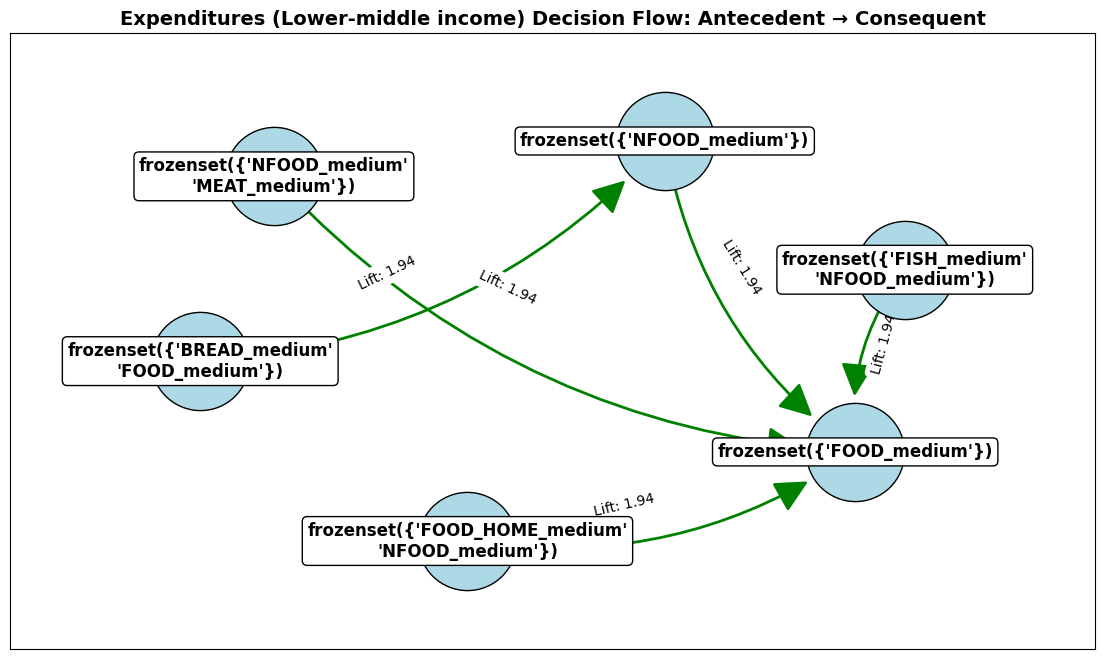

In [39]:
plot_dag(no_dups_lower_middle.nlargest(5, 'lift'), 'Expenditures (Lower-middle income)')

**Insights**

- Households with moderate spending on bread, meat, and fish are linked to moderate total food and non-food spending. This indicates that staples like bread and protein sources, such as meat and fish, remain core parts of their diet.

- The presence of fish as a significant expenditure suggests a more diversified diet compared to lower-income households, which prioritize more affordable food items. This suggests that lower-middle income families are able to allocate more towards varied nutrition.

- Unlike poor and low-income households, lower-middle-income families allocate a moderate amount to non-food expenses. This suggests a more balanced budget where essential non-food expenses like utilities, education, and transportation are not sacrificed in favor of food.

#### Middle income Class

In [40]:
freq_itemsets_middle = fpgrowth(
    middle_encoded, min_support=MIN_SUPPORT, use_colnames=True
)

rules_middle = association_rules(
    freq_itemsets_middle, metric="confidence", min_threshold=MIN_THRESHOLD
)

rules_middle

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(COMMUNICATION_medium),(TOTEX_high),0.689845,0.890728,0.642016,0.930667,1.044838,1.0,0.027551,1.576032,0.138362,0.684045,0.365495,0.825722
1,(TOTEX_high),(COMMUNICATION_medium),0.890728,0.689845,0.642016,0.720777,1.044838,1.0,0.027551,1.110775,0.392724,0.684045,0.099728,0.825722
2,(TRANSPORT_medium),(TOTEX_high),0.513981,0.890728,0.462104,0.899069,1.009364,1.0,0.004287,1.082641,0.019088,0.490242,0.076332,0.708932
3,"(TRANSPORT_medium, COMMUNICATION_medium)",(TOTEX_high),0.358720,0.890728,0.334069,0.931282,1.045529,1.0,0.014547,1.590145,0.067905,0.364952,0.371127,0.653167
4,"(TRANSPORT_medium, TOTEX_high)",(COMMUNICATION_medium),0.462104,0.689845,0.334069,0.722930,1.047959,1.0,0.015288,1.119408,0.085080,0.408457,0.106671,0.603598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,"(FOOD_OUTSIDE_medium, COMMUNICATION_medium)",(TOTEX_high),0.366814,0.890728,0.342163,0.932798,1.047231,1.0,0.015432,1.626026,0.071228,0.373794,0.385003,0.658469
263,"(FOOD_OUTSIDE_medium, TOTEX_high)",(COMMUNICATION_medium),0.472774,0.689845,0.342163,0.723735,1.049127,1.0,0.016022,1.122672,0.088817,0.417040,0.109268,0.609868
264,(MEAT_low),(TOTEX_high),0.356512,0.890728,0.331862,0.930857,1.045051,1.0,0.014306,1.580360,0.066992,0.362540,0.367233,0.651715
265,(MEAT_low),(FOOD_HOME_low),0.356512,0.516188,0.317145,0.889577,1.723357,1.0,0.133118,4.381434,0.652285,0.570861,0.771764,0.751987


In [41]:
no_dups_middle = rule_drop_duplicates(rules_middle)
no_dups_middle

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(COMMUNICATION_medium),(TOTEX_high),0.689845,0.890728,0.642016,0.930667,1.044838,1.0,0.027551,1.576032,0.138362,0.684045,0.365495,0.825722
2,(TRANSPORT_medium),(TOTEX_high),0.513981,0.890728,0.462104,0.899069,1.009364,1.0,0.004287,1.082641,0.019088,0.490242,0.076332,0.708932
3,"(TRANSPORT_medium, COMMUNICATION_medium)",(TOTEX_high),0.358720,0.890728,0.334069,0.931282,1.045529,1.0,0.014547,1.590145,0.067905,0.364952,0.371127,0.653167
5,(SUGAR_medium),(TOTEX_high),0.512509,0.890728,0.461737,0.900933,1.011457,1.0,0.005230,1.103009,0.023235,0.490426,0.093389,0.709657
6,(SUGAR_medium),(COMMUNICATION_medium),0.512509,0.689845,0.361295,0.704953,1.021900,1.0,0.007743,1.051205,0.043962,0.429571,0.048711,0.614343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,(FOOD_OUTSIDE_medium),(TOTEX_high),0.529065,0.890728,0.472774,0.893602,1.003226,1.0,0.001520,1.027009,0.006829,0.499223,0.026299,0.712187
262,"(FOOD_OUTSIDE_medium, COMMUNICATION_medium)",(TOTEX_high),0.366814,0.890728,0.342163,0.932798,1.047231,1.0,0.015432,1.626026,0.071228,0.373794,0.385003,0.658469
264,(MEAT_low),(TOTEX_high),0.356512,0.890728,0.331862,0.930857,1.045051,1.0,0.014306,1.580360,0.066992,0.362540,0.367233,0.651715
265,(MEAT_low),(FOOD_HOME_low),0.356512,0.516188,0.317145,0.889577,1.723357,1.0,0.133118,4.381434,0.652285,0.570861,0.771764,0.751987


In [42]:
top10_middle = top_n_rules(no_dups_middle, 10)
top10_middle

["['NFOOD_medium'] → ['FOOD_medium']",
 "['NFOOD_medium', 'TOTEX_high'] → ['FOOD_medium']",
 "['FOOD_low'] → ['NFOOD_high']",
 "['FOOD_low', 'TOTEX_high'] → ['NFOOD_high']",
 "['FOOD_HOME_low', 'FOOD_low'] → ['NFOOD_high']",
 "['FOOD_HOME_low', 'FOOD_low', 'TOTEX_high'] → ['NFOOD_high']",
 "['BREAD_low', 'FOOD_low'] → ['NFOOD_high']",
 "['BREAD_low', 'FOOD_low', 'TOTEX_high'] → ['NFOOD_high']",
 "['FOOD_HOME_low', 'BREAD_low', 'FOOD_low'] → ['NFOOD_high']",
 "['FOOD_low', 'COMMUNICATION_medium'] → ['NFOOD_high']"]

##### Middle income DAG

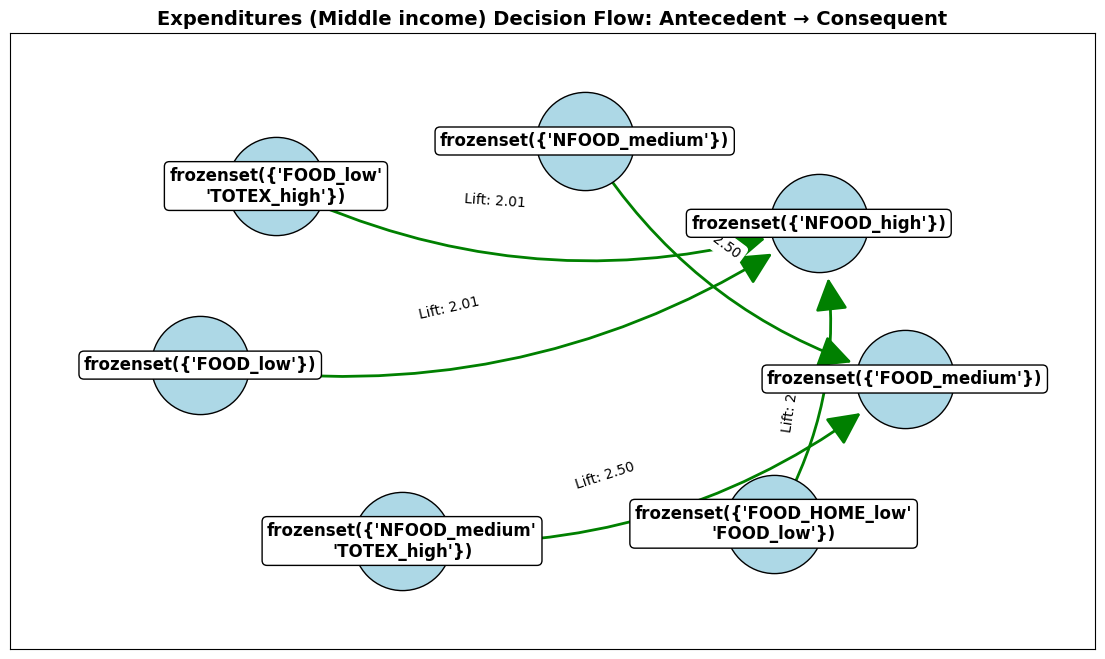

In [43]:
plot_dag(no_dups_middle.nlargest(5, 'lift'), 'Expenditures (Middle income)')

**Insights**

- Households with high total expenditure but low food spending indicate that food is no longer the dominant spending priority. This suggests that middle-income households have the capacity to allocate more towards non-food expenses, such as leisure, travel, and insurance.

- Households that allocate a moderate budget for non-food expenses also tend to have a moderate food budget. This suggests that they can balance their spending according to their needs and wants.

- The association between low food-at-home spending and low overall food spending suggests that some middle-income households may be shifting towards eating out rather than cooking at home.